<a href="https://colab.research.google.com/github/mylyyyyy/MachineLearning-smt5/blob/main/16_Mellyana_Tundjung_Modul04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama : Mellyana Tundjung
#NIM : 2141720061
#Absen : 16
#Kelas : D4TI-3B

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

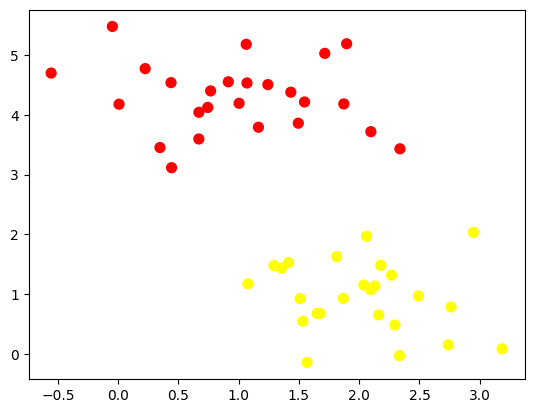

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Kode diatas menghasilkan data sampel dengan dua kelompok yang terpisah secara jelas (blobs) menggunakan make_blobs dari scikit-learn. Kemudian, data tersebut ditampilkan dalam sebuah plot sebaran dengan warna yang berbeda untuk masing-masing kelompok menggunakan Matplotlib.

(-1.0, 3.5)

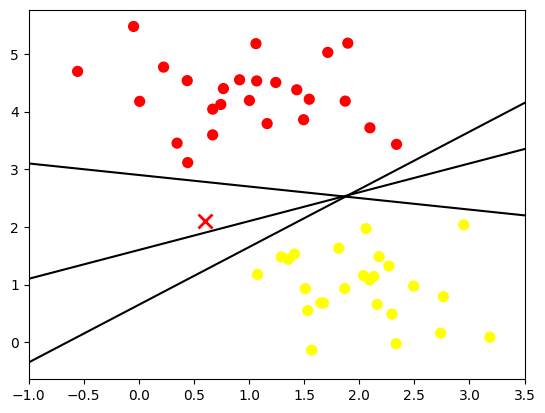

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Kode diatas menghasilkan plot yang terdiri dari beberapa komponen:

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Membuat scatter plot dari data X, di mana warna setiap titik ditentukan oleh label y (dua kelompok yang berbeda). Ukuran titik adalah 50, dan warna plot menggunakan skema 'autumn'.

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10): Menambahkan simbol 'x' berwarna merah pada koordinat (0.6, 2.1) dalam plot. Ini mewakili titik data baru yang akan diuji.

Loop for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: Menggambar tiga garis lurus dengan berbagai kemiringan (m) dan intercept (b) pada plot. Setiap garis lurus diplot dengan warna hitam ('-k') menggunakan nilai xfit yang telah dibuat sebelumnya.

plt.xlim(-1, 3.5): Mengatur batas sumbu x pada plot antara -1 dan 3.5.

Hasilnya adalah plot yang menampilkan data scatter, simbol 'x' merah, dan tiga garis lurus yang membantu dalam pemahaman visual terhadap pemisahan antara dua kelompok data.

(-1.0, 3.5)

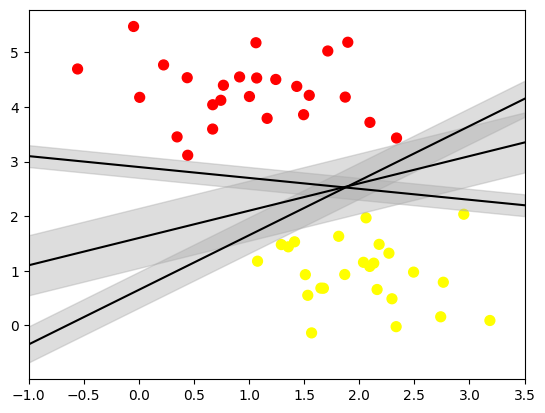

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Kode diatas memperluas plot sebelumnya dengan menambahkan tiga garis lurus yang mewakili model regresi linear, di mana setiap garis memiliki kemiringan (m) dan intercept (b) yang berbeda. Selain itu, untuk setiap garis, area antara garis regresi dan dua garis lainnya (dengan lebar d) diisi dengan warna abu-abu transparan untuk menggambarkan ketidakpastian model. Hasilnya adalah plot yang memberikan representasi visual tentang ketidakpastian dalam model regresi linear terhadap data yang tersebar.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Kode diatas menggunakan library scikit-learn (sklearn) untuk membuat model Support Vector Classifier (SVC) dengan kernel linear (kernel='linear') dan parameter C yang sangat besar (C=1E10). Kemudian, model tersebut dilatih dengan data X dan label y. Model SVC dengan kernel linear digunakan untuk melakukan klasifikasi dengan mencari hyperplane terbaik yang memisahkan dua kelompok data secara linear. Penggunaan nilai C yang sangat besar mengindikasikan bahwa model ini memiliki toleransi yang sangat rendah terhadap kesalahan klasifikasi, yang dapat menghasilkan hyperplane yang sangat ketat dalam memisahkan data.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

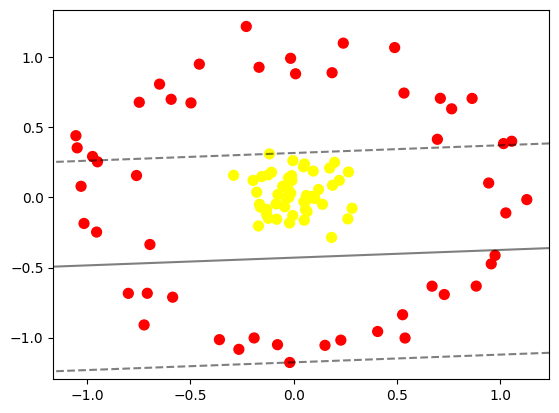

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 7.28090280e-01, -6.92134520e-01],
       [-8.26835227e-02, -1.54920777e-01],
       [-4.57028907e-01,  9.51353983e-01],
       [ 1.87203203e-01,  8.69438809e-02],
       [-2.65677463e-01, -1.08320387e+00],
       [-3.59845620e-01, -1.01401160e+00],
       [ 7.63723134e-01,  6.32516020e-01],
       [-1.96880065e-01,  1.21849536e-01],
       [-1.04807108e+00,  3.54215953e-01],
       [ 1.73405181e-01,  2.09939737e-01],
       [-1.79389365e-01,  3.77215620e-02],
       [ 8.76419565e-02,  6.43059778e-03],
       [-1.68101901e-01,  9.28985282e-01],
       [-1.54312812e-02,  9.92988225e-01],
       [-9.49914569e-01,  2.54778779e-01],
       [-9.51949584e-03,  1.21523597e-01],
       [ 6.94607395e-01,  4.15221105e-01],
       [-1.18011348e-01,  3.11016062e-01],
       [ 1.05416953e+00,  4.01263808e-01],
       [-8.00603057e-01, -6.83729948e-01],
       [-1.32330950e-01, -9.22203282e-02],
       [ 8.82544362e-01, -6.32063489e-01],
       

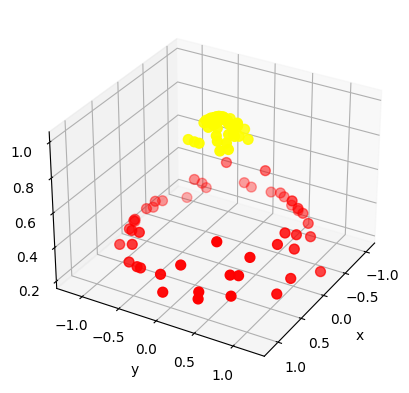

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Kode diatas menggunakan modul mpl_toolkits untuk menghasilkan plot 3D interaktif dengan menggunakan data X dan y. Fungsi plot_3D digunakan untuk menggambar scatter plot 3D, di mana sumbu x, y, dan z adalah fitur-fitur dari data X. Pengguna dapat berinteraksi dengan plot ini menggunakan widget ipywidgets, yang memungkinkan pengguna untuk mengubah sudut pandang (elevasi dan azimut) plot 3D secara interaktif. Hal ini memungkinkan pengguna untuk lebih memahami struktur data dalam tiga dimensi dan pengaruh perubahan sudut pandang terhadap visualisasi data.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

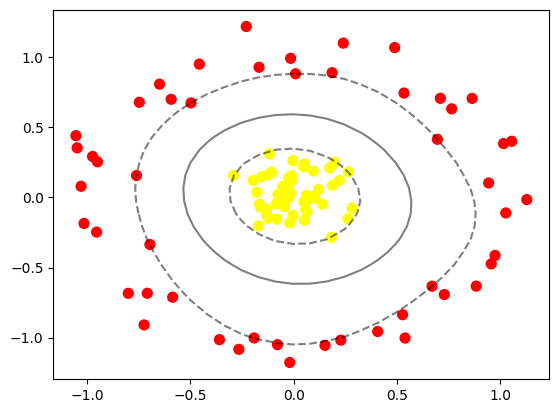

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

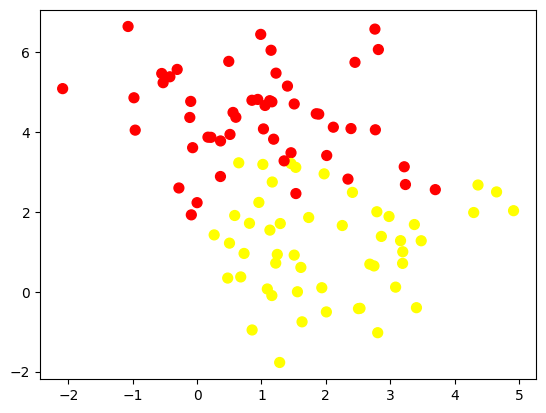

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

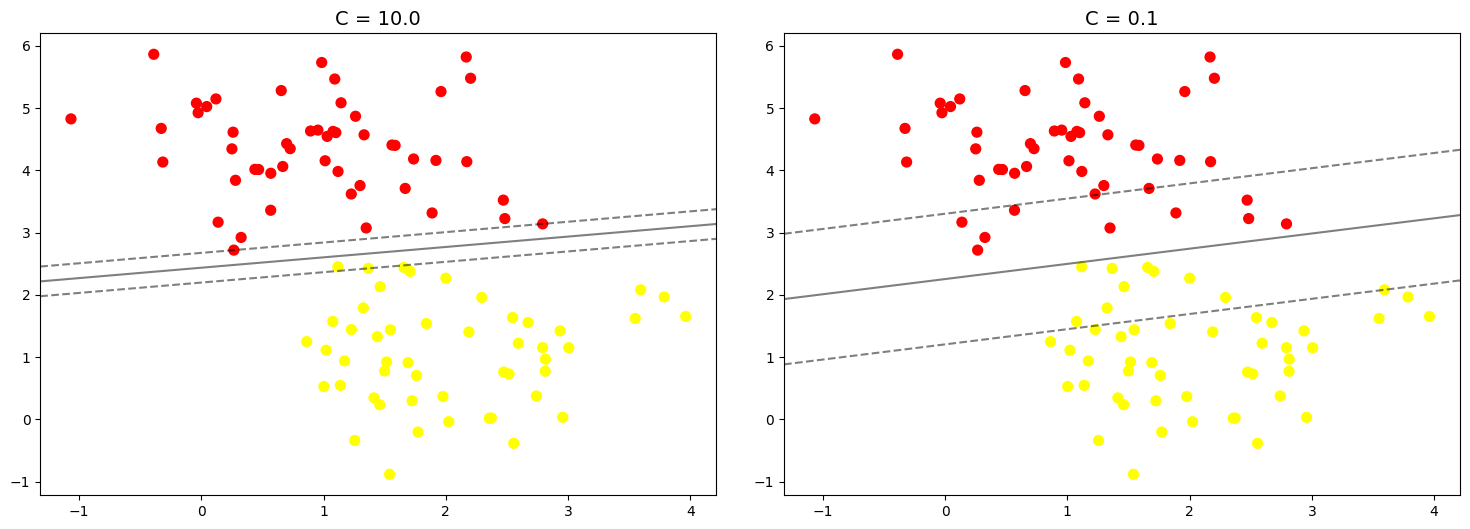

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#Praktikum 2 SVM pada image

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


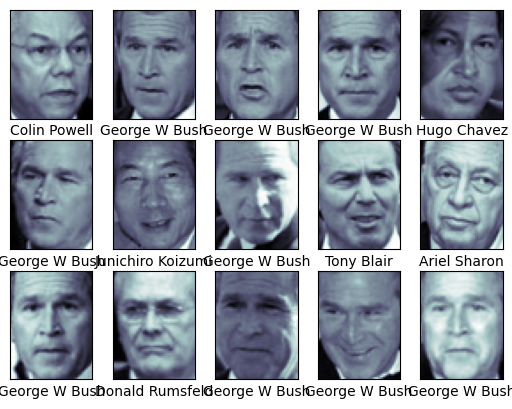

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 40.6 s, sys: 28.3 s, total: 1min 8s
Wall time: 40.9 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

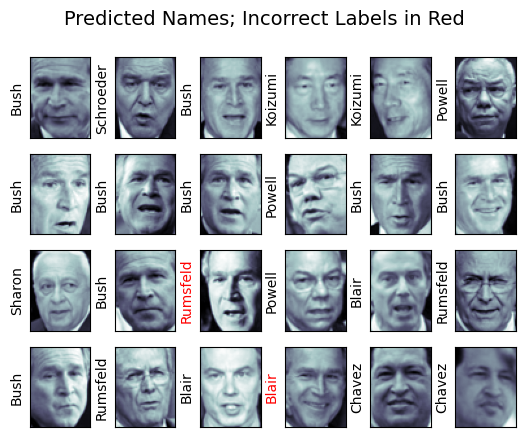

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

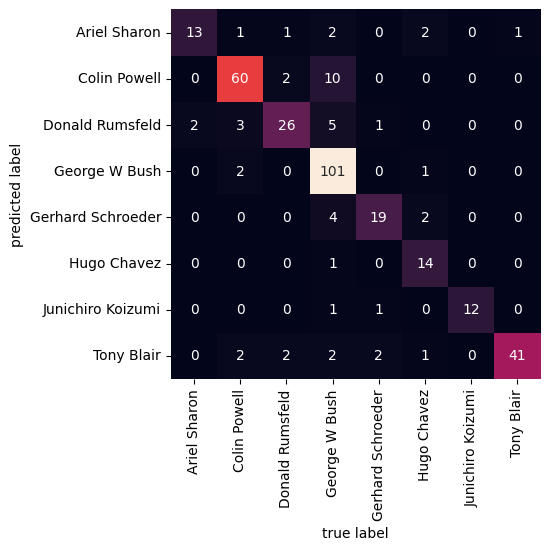

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Kode diatas adalah penggunaan dataset "LFW People" (Labeled Faces in the Wild) dari scikit-learn (fetch_lfw_people). Pertama, kode memuat dataset wajah yang telah disediakan, dengan syarat bahwa setiap individu dalam dataset harus memiliki setidaknya 60 gambar wajah. Kemudian, kode mencetak nama-nama target (nama individu) dari dataset, jumlah target yang ada, dan bentuk data gambar wajah. Selanjutnya, kode menggunakan scikit-learn untuk menghitung matriks kebingungan (confusion matrix) antara hasil prediksi yfit dan nilai sebenarnya ytest. Hasil matriks kebingungan ini ditampilkan dalam bentuk heatmap menggunakan library Seaborn (sns), dengan label sumbu x dan y yang menunjukkan nama target (nama individu). Ini membantu dalam visualisasi sejauh mana model klasifikasi berhasil mengklasifikasikan wajah-wajah individu dalam dataset.

#Praktikum 3 Naive Bayes dengan data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[162 100]
 [  3 100]
 [152  86]
 [ 91  93]
 [192  98]
 [324 106]
 [125 111]
 [143  94]
 [ 62 150]
 [121 107]
 [112 111]
 [ 56 114]
 [100  69]
 [106  14]
 [ 11 140]
 [ 69 130]
 [107 105]
 [175 120]
 [ 16   7]
 [ 91  84]
 [ 20 208]
 [174  70]
 [274 134]
 [204 100]
 [125 239]
 [151 206]
 [  1 114]
 [153 110]
 [ 52 105]
 [  8 176]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,162,100,0
1,3,100,0
2,152,86,0
3,91,93,0
4,192,98,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,162,100,Kelas B
1,3,100,Kelas B
2,152,86,Kelas B
3,91,93,Kelas B
4,192,98,Kelas B


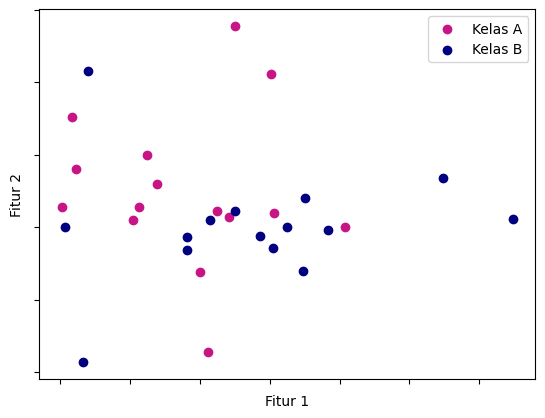

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.6666666666666666


Kode diatas mengimplementasikan penggunaan model Naive Bayes Multinomial (MultinomialNB) untuk melakukan klasifikasi. Pertama, dataset dibagi menjadi data latih (training) dan data uji (testing) menggunakan train_test_split. Selanjutnya, model MultinomialNB dilatih dengan data latih menggunakan fit. Kemudian, model digunakan untuk membuat prediksi terhadap data latih dan data uji, dan akurasi model diukur dengan menggunakan metrik akurasi (accuracy_score). Hasil akurasi pelatihan dan pengujian kemudian dicetak. Ini memberikan informasi tentang sejauh mana model berhasil mengklasifikasikan data latih dan data uji dengan benar. Model dengan akurasi yang tinggi pada kedua dataset tersebut cenderung memiliki kemampuan generalisasi yang baik.

#Praktikum 4 Multinomial Naive Bayes

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML polinema/modul04/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['SMS'].values
y = df['Labels'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


Kode diatas menggunakan model Naive Bayes Multinomial (MultinomialNB) dari scikit-learn untuk melakukan klasifikasi. Pertama, model MultinomialNB diinisialisasi dan dilatih dengan data latih (X_train dan y_train) menggunakan metode fit. Selanjutnya, model digunakan untuk membuat prediksi terhadap data latih dan data uji. Akurasi model diukur dengan menggunakan metrik akurasi (accuracy_score) pada kedua dataset tersebut. Hasil akurasi untuk data latih dan data uji kemudian dicetak. Ini memberikan gambaran tentang sejauh mana model berhasil mengklasifikasikan data dengan benar, baik pada data yang digunakan dalam pelatihan maupun data yang belum pernah dilihat sebelumnya (data uji). Model dengan akurasi yang tinggi pada kedua dataset cenderung memiliki kemampuan generalisasi yang baik.